# Group differences in force control and EEG activity 

## Force control

In [8]:
from pathlib import Path
import pandas as pd 
import numpy as np

dmdmean_file = str(Path.cwd().parent / 'results'/ 'mean_modes.csv') 
force_file = str(Path.cwd().parent / 'results' / 'Force_results.csv')
dmd_mean = pd.read_csv(dmdmean_file, index_col = 0)
force = pd.read_csv(force_file)
vpn_to_select = dmd_mean.part.unique()
force = force[force.part.isin(vpn_to_select)] #select only participans with corresponding eeg file
force = force[['label', 'dev', 'var', 'int var', 'part']]
force.label= force.label.replace([1,2,3,4],['steady right', 'sine right', 'steady left', 'sine left'])
print('#Participants in force files: %i' %len(force.part.unique()))
print('#Participants in EEG files: %i' %len(dmd_mean.part.unique()))

#Participants in force files: 43
#Participants in EEG files: 43


In [9]:
force['group'] = np.array(['expert' if 'e' in lab else 'novice' for lab in force.part])
force_long = pd.melt(force, id_vars=['part','group','label'], value_vars=['dev', 'var', 'int var'], var_name = 'measure', value_name = 'Force [N]')
print('long format:')
force_long.head()

long format:


,part,group,label,measure,Force [N]
0,ea01,expert,steady right,dev,0.127806
1,ea01,expert,sine right,dev,1.489845
2,ea01,expert,steady left,dev,0.107389
3,ea01,expert,sine left,dev,1.278983
4,ea02,expert,steady right,dev,0.088248


### Calcualte stats:

1. Descriptive stats

In [10]:
force.groupby(['group','label']).describe()

dev                                                    \
                    count      mean       std       min       25%       50%   
group  label                                                                  
expert sine left     21.0  1.413942  0.538242  0.865413  0.997843  1.278983   
       sine right    21.0  1.379710  0.430681  0.924971  1.063788  1.226392   
       steady left   21.0  0.088896  0.048418  0.037336  0.061550  0.084665   
       steady right  21.0  0.115658  0.048804  0.052280  0.088248  0.110406   
novice sine left     22.0  1.638490  0.615494  1.036228  1.247078  1.423585   
       sine right    22.0  1.715272  0.645037  1.002376  1.340847  1.542327   
       steady left   22.0  0.170596  0.104108  0.045769  0.092543  0.149173   
       steady right  22.0  0.187638  0.145544  0.050190  0.092711  0.138057   

                                          var            ...            \
                          75%       max count      mean  ...       75%   
group  label                                             ...             
expert sine left     1.555720  2.907761  21.0  1.045662  ...  1.129328   
       sine right    1.631847  2.600498  21.0  1.045969  ...  1.201537   
       steady left   0.104312  0.268756  21.0  0.052417  ...  0.062649   
       steady right  0.127806  0.237539  21.0  0.065806  ...  0.071825   
novice sine left     1.775394  3.319861  22.0  1.185237  ...  1.385626   
       sine right    1.843726  3.198970  22.0  1.230804  ...  1.370012   
       steady left   0.239973  0.450228  22.0  0.072177  ...  0.086466   
       steady right  0.225455  0.712664  22.0  0.083338  ...  0.093909   

                              int var                                          \
                          max   count      mean       std       min       25%   
group  label                                                                    
expert sine left     1.993524    21.0  0.387863  0.137206  0.196993  0.267348   
       sine right    1.807532    21.0  0.424369  0.193934  0.171489  0.309084   
       steady left   0.092077    21.0  0.036646  0.029853  0.010190  0.022531   
       steady right  0.120362    21.0  0.050486  0.025069  0.016949  0.027572   
novice sine left     1.883167    22.0  0.403409  0.099759  0.279931  0.325300   
       sine right    1.930834    22.0  0.483939  0.173525  0.221516  0.357620   
       steady left   0.135038    22.0  0.062253  0.038884  0.012191  0.037445   
       steady right  0.211767    22.0  0.081323  0.056898  0.018913  0.044323   

                                                   
                          50%       75%       max  
group  label                                       
expert sine left     0.374114  0.490980  0.691942  
       sine right    0.388721  0.431874  1.029071  
       steady left   0.029285  0.038446  0.149682  
       steady right  0.051097  0.065351  0.106313  
novice sine left     0.375691  0.426142  0.647872  
       sine right    0.459227  0.553070  0.932958  
       steady left   0.049081  0.082998  0.148255  
       steady right  0.067449  0.088918  0.267659  

[8 rows x 24 columns]

2. statistics

In [17]:
from scipy.stats import shapiro

def test_normality(df, test, output = False):
    stats = []
    print(test) 
    for v in df.measure.unique():
        print('%s:' %v)
        for l in  df.label.unique():
            for g in df.group.unique():
                data = df[(df.label == l) & (df.group == g) & (df.measure == v)]['Force [N]']
                stat , p = test(data)
                print('Group: %s / task: %s / variable: %s / Statistics=%.3f, p=%.3f' % (g,l,v,stat, p)) 
                stats.append((stat,p))
        print('\n')
    if output == True:
        return(stats) 

test_normality(force_long, shapiro)


<function shapiro at 0x7fb06d85f5e0>
dev:
Group: expert / task: steady right / variable: dev / Statistics=0.922, p=0.093
Group: novice / task: steady right / variable: dev / Statistics=0.738, p=0.000
Group: expert / task: sine right / variable: dev / Statistics=0.866, p=0.008
Group: novice / task: sine right / variable: dev / Statistics=0.868, p=0.007
Group: expert / task: steady left / variable: dev / Statistics=0.737, p=0.000
Group: novice / task: steady left / variable: dev / Statistics=0.918, p=0.069
Group: expert / task: sine left / variable: dev / Statistics=0.856, p=0.005
Group: novice / task: sine left / variable: dev / Statistics=0.803, p=0.001


var:
Group: expert / task: steady right / variable: var / Statistics=0.903, p=0.039
Group: novice / task: steady right / variable: var / Statistics=0.813, p=0.001
Group: expert / task: sine right / variable: var / Statistics=0.903, p=0.039
Group: novice / task: sine right / variable: var / Statistics=0.929, p=0.116
Group: expert / tas

In [18]:
from scipy.stats import mannwhitneyu, ttest_ind
from statsmodels.stats.multitest import fdrcorrection


force_par = force_long[(force_long.label == 'steady left') & (force_long.measure == 'var')]

def calc_stat(df, test, output = False):
    stats = {}
    for v in df.measure.unique():
        for l in  df.label.unique():
            x = df[(df.label == l) & (df.measure == v) & (df.group == 'expert')]['Force [N]']
            y = df[(df.label == l) & (df.measure == v) & (df.group == 'novice')]['Force [N]']
            stat , p = test(x,y)
            stats[l + '_' + v] = (stat,p)
    if output == True:
        return(stats) 

result_no_par= calc_stat(force_long, mannwhitneyu, output = True)
result_par  = calc_stat(force_par, ttest_ind, output = True)

for k in result_par.keys(): 
    result_no_par[k] = result_par[k]

res = pd.DataFrame(result_no_par).T
res.columns = ['Statistical Value', 'p']
res['p'] = fdrcorrection(res.p.values)[1]

res

,Statistical Value,p
steady right_dev,158.000000,0.117232
sine right_dev,154.000000,0.108124
steady left_dev,112.000000,0.028190
sine left_dev,165.000000,0.121653
steady right_var,151.000000,0.106825
sine right_var,151.000000,0.106825
steady left_var,-2.990227,0.028190
sine left_var,163.000000,0.121203
steady right_int var,139.000000,0.078622
sine right_int var,163.000000,0.121203


## EEG activity 

In [13]:
import mne 
m = mne.channels.make_standard_montage('biosemi32') 
info = mne.create_info(
        ch_names=m.ch_names, sfreq=200., ch_types='eeg')
info.set_montage(m)
# loading results of EEG produced by perm_test.py
p_values = pd.read_csv(str(Path.cwd().parent / 'results'/ 'eeg_stats' / 'mean_modes_perm_p.csv'), index_col=0)
mask = p_values <= 0.05
t_values = pd.read_csv(str(Path.cwd().parent / 'results'/ 'eeg_stats' / 'mean_modes_perm_t.csv'), index_col=0)

t_values.head()

,sine left_theta,sine left_alpha,sine left_beta1,sine left_beta2,sine right_theta,sine right_alpha,sine right_beta1,sine right_beta2,steady left_theta,steady left_alpha,steady left_beta1,steady left_beta2,steady right_theta,steady right_alpha,steady right_beta1,steady right_beta2
0,-0.591004,-0.884511,-0.839986,-0.909630,-1.211055,-1.776694,-1.625774,-1.654447,-1.034262,-1.069998,-0.906610,-0.963910,-1.801246,-2.026431,-2.054514,-1.174964
1,0.094813,-0.737606,-1.125207,-1.536737,-0.339605,-1.336851,-1.408476,-1.707019,-0.141574,-0.784656,-1.329727,-1.270594,-0.853822,-1.458889,-2.122675,-1.592707
2,1.018100,0.470161,0.248017,-0.090965,0.487073,-0.312574,-0.871248,-1.258476,1.246303,0.603124,-0.118824,0.018151,-0.433393,-0.396679,-1.177549,-0.588797
3,0.620125,-0.189782,-0.330155,-0.843403,0.212750,-0.921299,-0.969259,-1.538581,0.417238,-0.303249,-0.597558,-0.696174,-0.256235,-1.038978,-1.577737,-1.168753
4,0.849844,-0.414270,-1.024106,-1.562335,0.374318,-1.250976,-1.834495,-2.212530,0.699950,-0.504807,-0.730036,-1.182117,-0.167218,-1.487255,-1.965431,-2.047057


## Figure 1

In [14]:
# import setup image
import matplotlib.pyplot as plt
tiff_file = str(Path.cwd().parent / 'Figures'/ 'setup.tiff')
setup = plt.imread(tiff_file)

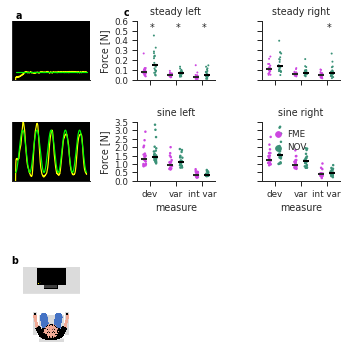

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import glob
import pandas as pd
from pathlib import Path 

tiff_file = str(Path.cwd().parent / 'Figures'/ 'setup.tiff')
setup = plt.imread(tiff_file)
pal = sns.diverging_palette(300, 160, s=80, l=55, n=2)
sns.set_context(context='paper', font_scale=1)
sns.set_style("ticks")
cm = 1/2.54
current_dir = Path.cwd()
force_path = glob.glob(str(current_dir.parent.parent / 'data' / 'BHS' / 'Verhalten_Motorik_Pre_Post' / 'Pre')) #location of force files 
f = glob.glob(force_path[0] + '/ea01*')
tasks = ['steady left', 'steady right', 'sine left', 'sine right']
fig = plt.figure(figsize = (14*cm, 14*cm))
gs = gridspec.GridSpec(4, 6)
# for row in range(8):
#     for col in range(8):
#         plt.subplot(gs[row, col])
# steady
f1 = glob.glob(f[0] + '/*r38axis0.dat')
d1 = pd.read_csv(f1[0], skiprows = 2)
steady_dat = d1['Pinch 1'].values
steady_targ = d1['MVC 1'].values

ax0 = plt.subplot(gs[:1, :2])
ax0.plot(steady_dat, color = 'yellow')
ax0.plot(steady_targ, color = 'lime')
ax0.set_facecolor('k')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.set_ylim(0,14)
ax0.text(-.5, 14.5, "a", horizontalalignment='left', size='medium', color='black', weight='semibold')

# sine
f2 = glob.glob(f[0] + '/*r160axis0.dat')
d2 = pd.read_csv(f2[0], skiprows = 2)
sine_dat = d2['Pinch 1'].values
sine_targ = d2['MVC 1'].values


ax1 = plt.subplot(gs[1:2, :2])
ax1.plot(sine_dat, color = 'yellow')
ax1.plot(sine_targ, color = 'lime')
ax1.set_facecolor('k')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.set_ylim(0,14)

## force results
#steady left
ax2 = plt.subplot(gs[:1, 2:4])
sns.stripplot(x="measure", y="Force [N]", hue = 'group',
                data=force_long[(force_long.label == 'steady left')],
                dodge = True, alpha=1, zorder=1, ax = ax2, s = 2, palette=pal)

sns.pointplot(x="measure", y="Force [N]", hue = 'group',
            data=force_long[(force_long.label == 'steady left')],markers=["_","_"], dodge=.42, join=False, color = 'k',
            ci=None, estimator = np.median, ax = ax2, scale = 1.25)
ax2.set_ylim(0,0.6)
ax2.set_yticks(np.arange(0,0.7,0.1))
ax2.set_xticklabels([])
ax2.get_legend().remove()
ax2.set_xlabel('')  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_title('steady left')       
ax2.text(0,0.5,'*')
ax2.text(1,0.5,'*')
ax2.text(2,0.5,'*')
ax2.text(-1, .65, "c", horizontalalignment='left', size='medium', color='black', weight='semibold')
#steady right
ax3 = plt.subplot(gs[:1, 4:])
sns.stripplot(x="measure", y="Force [N]", hue = 'group',
                data=force_long[(force_long.label == 'steady right')],
                dodge = True, alpha=1, zorder=1, ax = ax3, s = 2, palette=pal)

sns.pointplot(x="measure", y="Force [N]", hue = 'group',
            data=force_long[(force_long.label == 'steady right')], markers=["_","_"],dodge=.42, join=False, color = 'k',
            ci=None, estimator = np.median, ax = ax3, scale = 1.25)
ax3.set_ylim(0,0.6)
ax3.set_yticks(np.arange(0,0.7,0.1))
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.get_legend().remove()
ax3.set_ylabel(None)
ax3.set_xlabel(None)  
ax3.set_title('steady right')   
ax3.text(2,0.5,'*')

#sine left
ax4 = plt.subplot(gs[1:2, 2:4])
sns.stripplot(x="measure", y="Force [N]", hue = 'group',
                data=force_long[(force_long.label == 'sine left')],
                dodge = True, alpha=1, zorder=1, ax = ax4, s = 2.5, palette=pal)

sns.pointplot(x="measure", y="Force [N]", hue = 'group',
            data=force_long[(force_long.label == 'sine left')],markers=["_","_"], dodge=.42, join=False, color = 'k',
            ci=None, estimator = np.median, ax = ax4, scale = 1.25)
ax4.set_ylim(0,3.5)
ax4.set_yticks(np.arange(0,3.6,0.5))
ax4.get_legend().remove()
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax4.set_title('sine left')       

#sine right
ax5 = plt.subplot(gs[1:2, 4:])
sns.stripplot(x="measure", y="Force [N]", hue = 'group',
                data=force_long[(force_long.label == 'sine right')],
                dodge = True, alpha=1, zorder=1, ax = ax5, s = 2.5, palette=pal)

sns.pointplot(x="measure", y="Force [N]", hue = 'group',
            data=force_long[(force_long.label == 'sine right')],markers=["_","_"], dodge=.42, join=False, color = 'k',
            ci=None, estimator = np.median, ax = ax5, scale = 1.25)
ax5.set_ylim(0,3.5)
ax5.set_yticks(np.arange(0,3.6,0.5))
ax5.set_yticklabels([])
ax5.get_legend().remove()
ax5.set_ylabel(None)
ax5.set_title('sine right') 
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles[:2], ['FME','NOV','median'], title="",
        handletextpad=0, columnspacing=1,
        loc="upper left", ncol=1, frameon=False, markerscale = 0.75)
sns.despine()

# setup 
ax6 = plt.subplot(gs[2:, :2])
ax6.imshow(setup, interpolation='none')
ax6.set_yticklabels([])
ax6.set_xticklabels([])
ax6.set_yticks([])
ax6.set_xticks([])
ax6.text(-6, -2, "b", horizontalalignment='left', size='medium', color='black', weight='semibold')
sns.despine(ax = ax6, top=True, right=True, left=True, bottom=True)
fig.tight_layout()
fig.savefig(str(Path.cwd().parent / 'Figures' / 'force_result.svg'))

<ipython-input-16-b140e9c58ede>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append(plt.subplot(gs[row, col]))


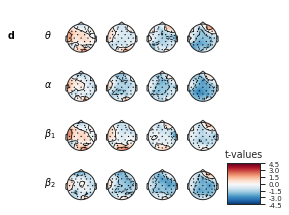

In [16]:
fig = plt.figure(figsize = (7*cm, 7*cm))
gs = gridspec.GridSpec(4, 5)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[3, 0])
ax1.text(-.5, 0, "d", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax1.text(-.25, 0, "$\\theta$", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax2.text(-.25, 0, "$\\alpha$", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax3.text(-.25, 0, "$\\beta_1$", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax4.text(-.25, 0, "$\\beta_2$", horizontalalignment='left', size='medium', color='black', weight='semibold')

axes = []
for row in range(0,4,1):
        for col in range(0,4,1):
                axes.append(plt.subplot(gs[row, col]))
axes.append(plt.subplot(gs[3, 4]))      
evoked = mne.EvokedArray(t_values.iloc[:,:].values, info, tmin=0)
evoked.plot_topomap(ch_type='eeg', scalings=1,
                    time_format=' ', vmin=-4.5, vmax=4.5,
                    units='t-values',
                    size=3, axes = axes,colorbar = True,
                    time_unit='s', title = None, nrows = 4, ncols = 4, res = 1000)
axes[7].text(-6, -2, "b", horizontalalignment='left', size='medium', color='black', weight='semibold')
fig.savefig(str(Path.cwd().parent / 'Figures' / 'dmd_maps.svg'))